In [2]:
print("_")

_


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df_1 = pd.read_csv('Basic_linear_regression_dataset/HeightWeight.csv', index_col=0)

In [11]:
df_1.head()

,Weight(Pounds),Height(Inches)
Index,,
1,112.9925,65.78331
2,136.4873,71.51521
3,153.0269,69.39874
4,142.3354,68.21660
5,144.2971,67.78781


In [72]:
df = pd.read_csv('Basic_linear_regression_dataset/HeightWeight.csv')

In [73]:
df.drop("Index", axis=1, inplace=True)

In [74]:
df.head()

,Weight(Pounds),Height(Inches)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


Text(0, 0.5, 'Height(Inches)')

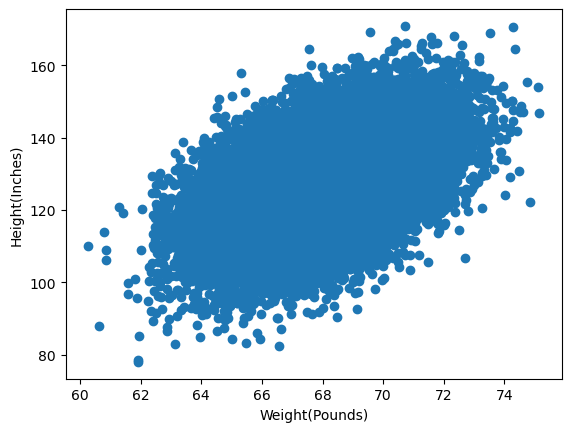

In [75]:
plt.scatter(df['Weight(Pounds)'], df['Height(Inches)'])
plt.xlabel('Weight(Pounds)')
plt.ylabel('Height(Inches)')

## 1-Divide the features based on independent & dependent features

In [76]:
X = df[['Weight(Pounds)']] # independent feature
y = df['Height(Inches)'] # dependent feature

## 2-Train Test split of dataset

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000, 1), (5000, 1), (20000,), (5000,))

## 3-Standardize the dataset

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [84]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

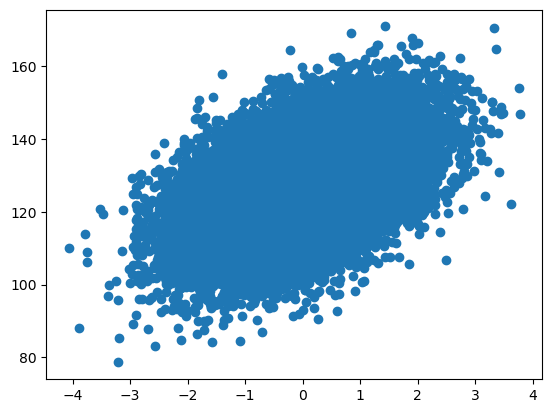

In [85]:
plt.scatter(X_train, y_train)

## 4-Train the model using Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
regressor = LinearRegression()

In [88]:
regressor.fit(X_train, y_train)

LinearRegression()

In [89]:
print("The slope or coefficient of weight is ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

The slope or coefficient of weight is  [5.82644432]
Intercept:  127.07814619150004


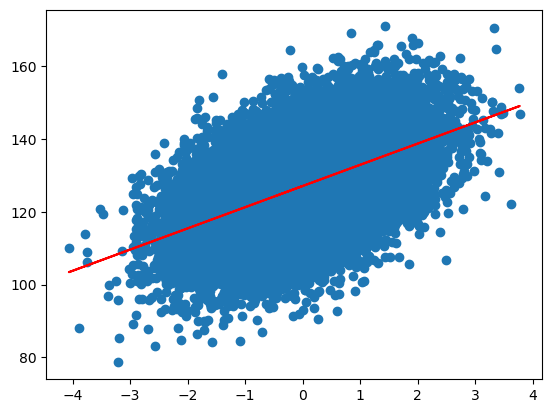

In [90]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train = 127.08 + 5.82(X_train)

### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test = 127.08 + 5.82(X_test)

In [91]:
y_pred_test = regressor.predict(X_test)

In [92]:
y_pred_test, y_test

(array([128.35375536, 126.75169764, 126.03112982, ..., 128.79843078,
        124.32053621, 134.86505889]),
 6868     134.2855
 24016    111.9666
 9668     135.9871
 13640    126.3802
 14018    100.1810
            ...   
 8670     138.0941
 11839    105.2101
 4013     141.1859
 21147    129.5261
 695      134.7527
 Name: Height(Inches), Length: 5000, dtype: float64)

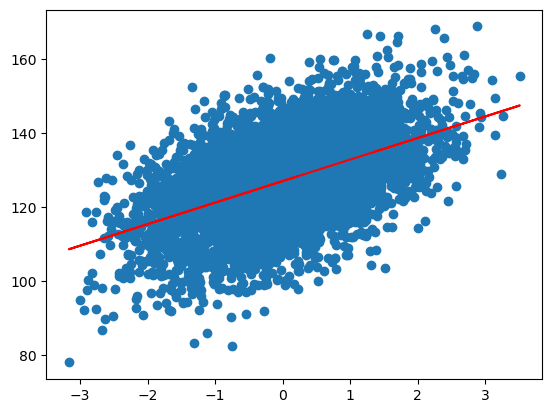

In [93]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

## 5-Performance Metrics


#### MSE, MAE, RMSE
#### R square & adjusted R2

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [95]:
mse = mean_absolute_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

8.034068477929797
8.034068477929797
2.8344432394969203


## R square 
Formula

**R^2 = 1 - SSR/SST**
R^2 = coefficient of determination 
SSR = sum of squares of residuals 
SST = total sum of squares

In [98]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

In [99]:
score

0.26045007796462816

### Adjusted R Square

**Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [100]:
1- (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.26030210879255233

## 6-Predict

In [109]:
scaled_weight = scaler.transform([[80]])
scaled_weight

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[6.24887654]])

In [110]:
print("The Height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The Height prediction for weight 80 kg is : [163.48687741]


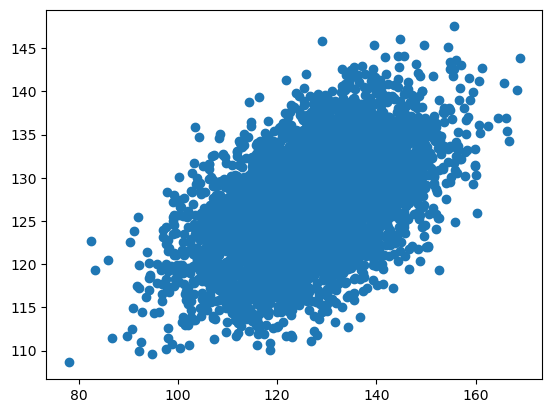

In [106]:
## Assumptions
## plot a scatter plot for the prediction

plt.scatter(y_test, y_pred_test)

In [66]:
residuals = y_test - y_pred_test
residuals

6868    -0.147071
24016    1.126462
9668    -1.049658
13640    1.079491
14018    3.191605
           ...   
8670     0.057335
11839    1.060043
4013    -0.557497
21147   -1.091787
695      1.960541
Name: Height(Inches), Length: 5000, dtype: float64

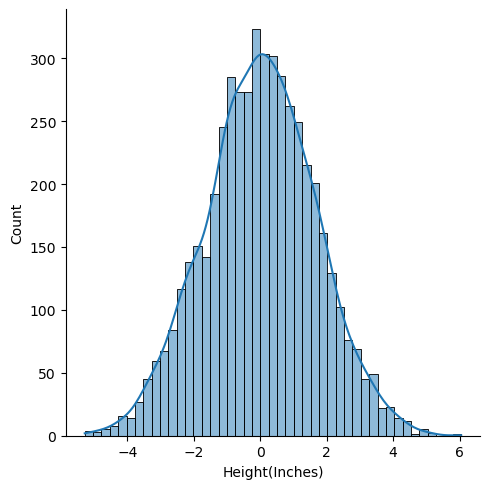

In [69]:
sns.displot(residuals, kde=True)

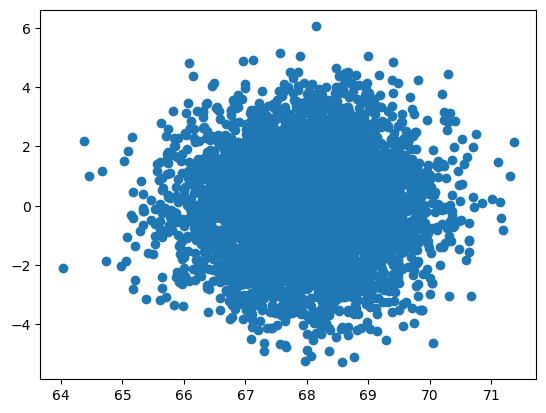

In [70]:
plt.scatter(y_pred_test, residuals)